In [1]:
! pip install semantic-kernel==0.4.6.dev0

  Using cached semantic_kernel-0.4.6.dev0-py3-none-any.whl.metadata (2.1 kB)
Using cached semantic_kernel-0.4.6.dev0-py3-none-any.whl (224 kB)
  Attempting uninstall: semantic-kernel
    Found existing installation: semantic-kernel 0.5.1.dev0
    Uninstalling semantic-kernel-0.5.1.dev0:
      Successfully uninstalled semantic-kernel-0.5.1.dev0


In [2]:
import os
import pandas as pd

In [3]:
import asyncio
import semantic_kernel as sk
from semantic_kernel.connectors.ai.open_ai import AzureChatCompletion

In [4]:
kernel = sk.Kernel()

In [5]:
deployment = "gpt35turbo16k"
api_key = "5d69dd6f0aa14121ae81066435443abf"
endpoint = "https://openai-poc-east.openai.azure.com/"
api_version = "2023-03-15-preview"

In [6]:
kernel.add_chat_service("chat", AzureChatCompletion(
                                deployment_name=deployment, 
                                endpoint = endpoint,
                                api_key = api_key,
                                api_version = api_version))

In [7]:
base_skills_directory = 'C:/Users/ssirish/OneDrive - Daiichi Sankyo/Documents/Files/PoCs_Coding/Fabric/skills/Files/Skills/'
print(base_skills_directory)

C:/Users/ssirish/OneDrive - Daiichi Sankyo/Documents/Files/PoCs_Coding/Fabric/skills/Files/Skills/


In [8]:
skills = kernel.import_semantic_plugin_from_directory(base_skills_directory, 'dataskill')
# import_semantic_plugin_from_directory
# import_semantic_skill_from_directory

In [9]:
df = pd.read_csv("C:/Users/ssirish/OneDrive - Daiichi Sankyo/Documents/Files/PoCs_Coding/Fabric/datasets/ProductList.csv")

In [10]:
context_variables = sk.ContextVariables(variables={
    "question": "Generate a bar chart to list Product Type and display the number of products owned by the corresponding Product Type"
})

In [11]:
# display(skills)
print(skills)

{'csv': SKFunction(), 'spark': SKFunction(), 'sql': SKFunction()}


In [12]:
csv_skill = skills["csv"]
pysql_skill = skills["spark"]
sql_skill = skills["sql"]

In [13]:
result = await csv_skill.invoke_async(variables=context_variables)

In [14]:
result.result

"import matplotlib.pyplot as plt\n\nproduct_type_counts = df['Product Type'].value_counts()\nproduct_types = product_type_counts.index\nproduct_counts = product_type_counts.values\n\nplt.bar(product_types, product_counts)\nplt.xlabel('Product Type')\nplt.ylabel('Number of Products')\nplt.title('Number of Products by Product Type')\nplt.xticks(rotation=270)\n\nplt.show()"

In [15]:
sql = result.result.replace("\\n","").replace("\\n\\n", "")
print(sql,'sql')

import matplotlib.pyplot as plt

product_type_counts = df['Product Type'].value_counts()
product_types = product_type_counts.index
product_counts = product_type_counts.values

plt.bar(product_types, product_counts)
plt.xlabel('Product Type')
plt.ylabel('Number of Products')
plt.title('Number of Products by Product Type')
plt.xticks(rotation=270)

plt.show() sql


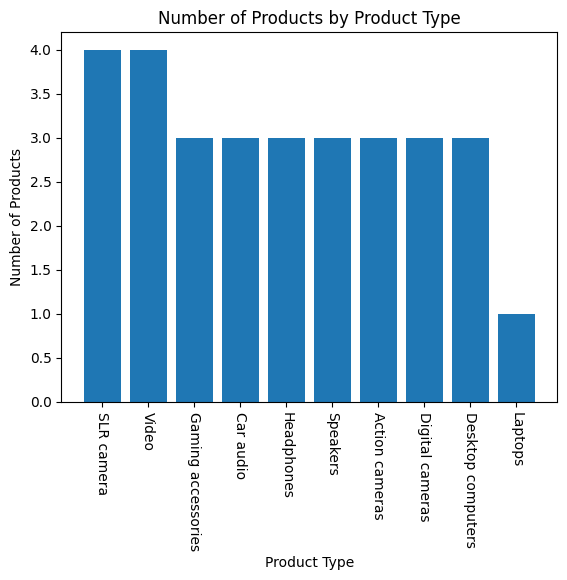

In [16]:
exec(sql)

In [17]:
context_variables = sk.ContextVariables(variables={
    "question": "Find Product Type belonging to Car audio and display them as table "
})

In [18]:
result = await csv_skill.invoke_async(variables=context_variables)

In [19]:
exec(result.result)

   Product Type
3     Car audio
12    Car audio
19    Car audio
